In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [38]:
df=pd.read_csv("C:/Users/mneha/OneDrive/Documents/GitHub/DSData/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [39]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [40]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [42]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [43]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [44]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical_columns : ", categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("numerical Columns: ", numerical_col)        

Categorical_columns :  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


numerical Columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [45]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

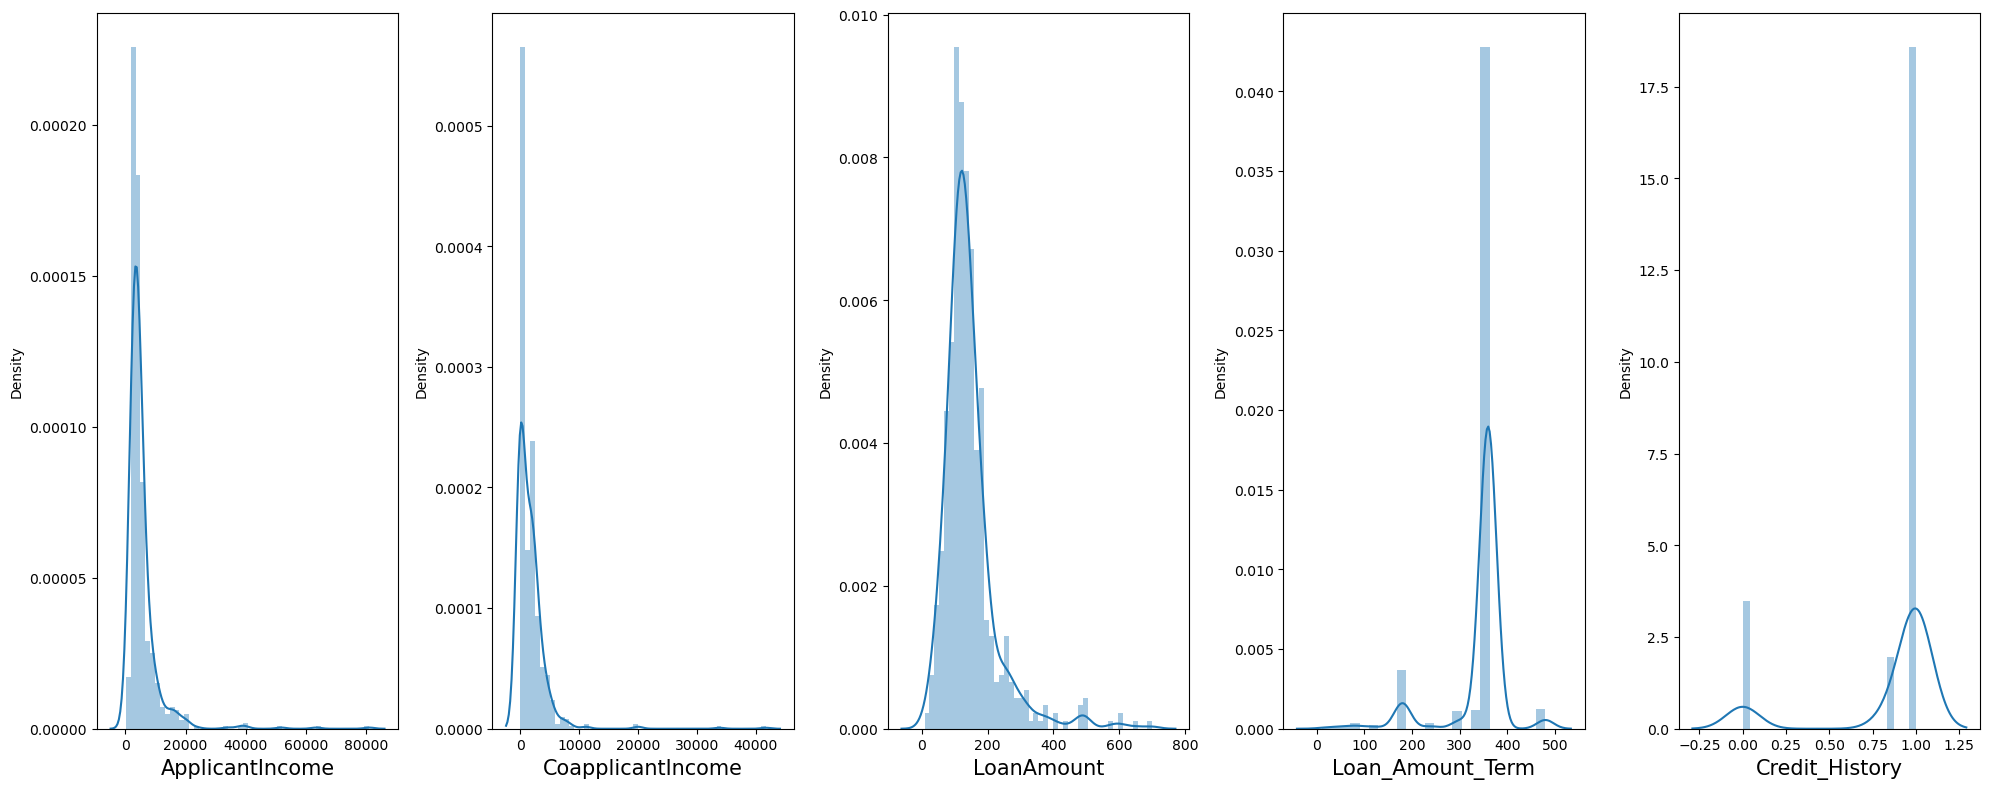

In [46]:
plt.figure(figsize=(20,8))
plotnumber=1
for col in numerical_col:
    if plotnumber<=5:
        ax=plt.subplot(1,5,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=15)
    plotnumber+=1
plt.tight_layout()    

In [47]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [49]:
df['ApplicantIncome']= np.cbrt(df['ApplicantIncome'])

In [50]:
df['CoapplicantIncome']= np.cbrt(df['CoapplicantIncome'])

In [51]:
df['LoanAmount']= np.cbrt(df['LoanAmount'])

In [52]:
df['Loan_Amount_Term']= np.cbrt(df['Loan_Amount_Term'])

In [53]:
df['Credit_History']= np.cbrt(df['Credit_History'])

In [54]:
df.skew()

ApplicantIncome      1.030738
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -3.573315
Credit_History      -2.014285
dtype: float64

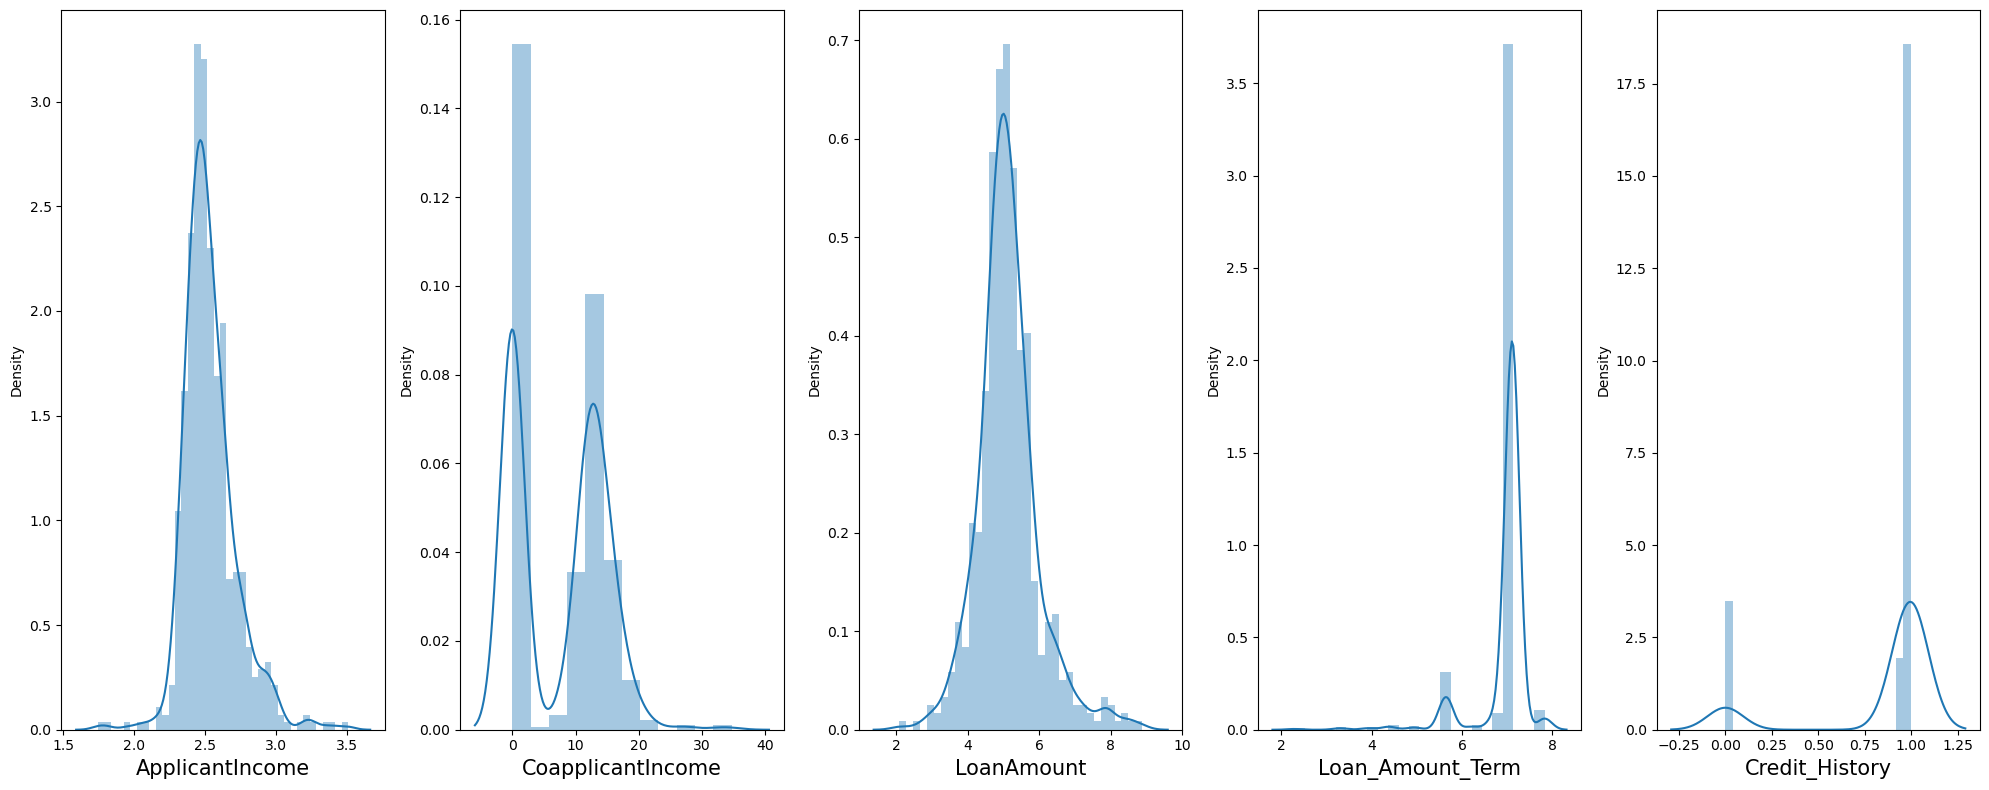

In [55]:
plt.figure(figsize=(20,8))
plotnumber=1
for col in numerical_col:
    if plotnumber<=5:
        ax=plt.subplot(1,5,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=15)
    plotnumber+=1
plt.tight_layout()    

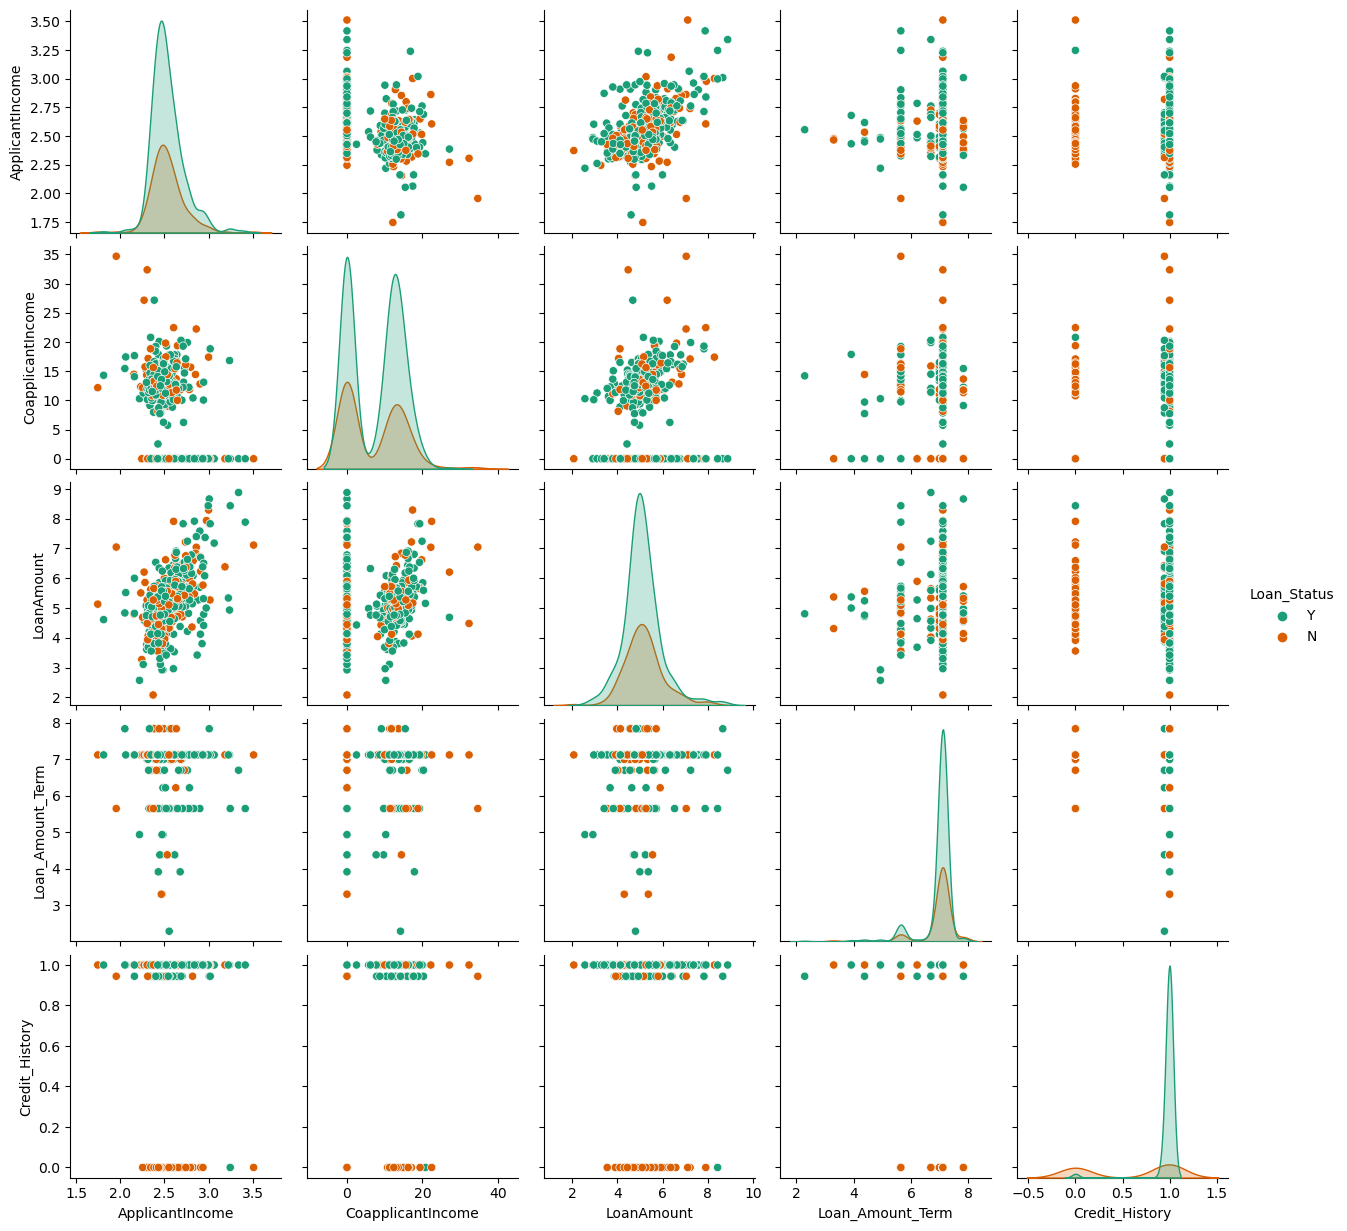

In [56]:
sns.pairplot(df, hue='Loan_Status', palette='Dark2')
plt.show()

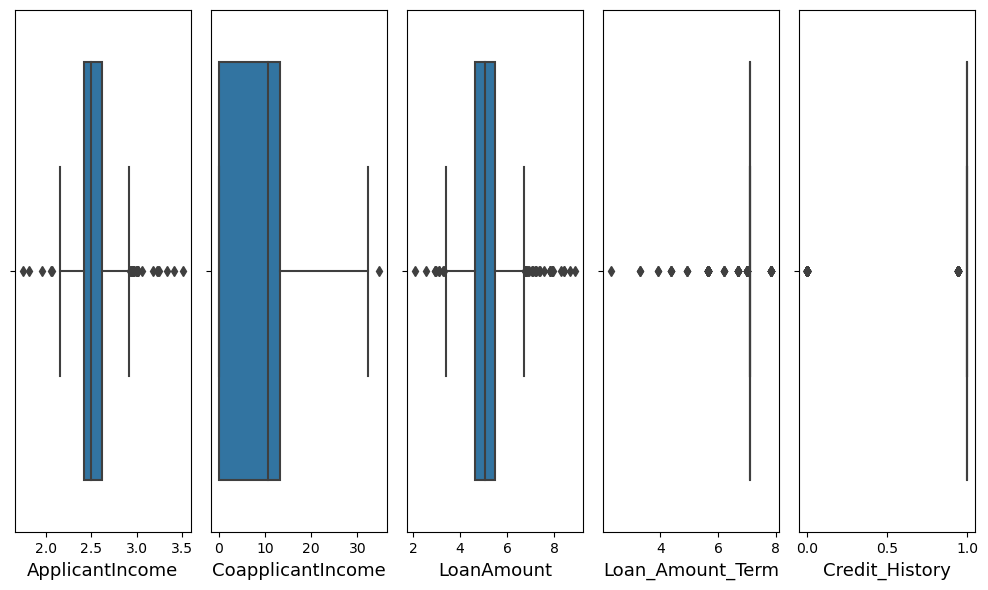

In [57]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in numerical_col:
    if plotnumber<=5:
        ax=plt.subplot(1,5,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=13)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()    
    

In [58]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,2.621589,0.000000,5.270588,7.113787,1.0,Urban,Y,2.621589
1,LP001003,Male,Yes,1,Graduate,No,2.551493,11.467457,5.039684,7.113787,1.0,Rural,N,14.018950
2,LP001005,Male,Yes,0,Graduate,Yes,2.434147,0.000000,4.041240,7.113787,1.0,Urban,Y,2.434147
3,LP001006,Male,Yes,0,Not Graduate,No,2.394004,13.310098,4.932424,7.113787,1.0,Urban,Y,15.704103
4,LP001008,Male,No,0,Graduate,No,2.629024,0.000000,5.204828,7.113787,1.0,Urban,Y,2.629024


In [59]:
df.shape

(614, 14)

In [60]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income         float64
dtype: object

In [61]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical_columns : ", categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("numerical Columns: ", numerical_col)        

Categorical_columns :  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


numerical Columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income']


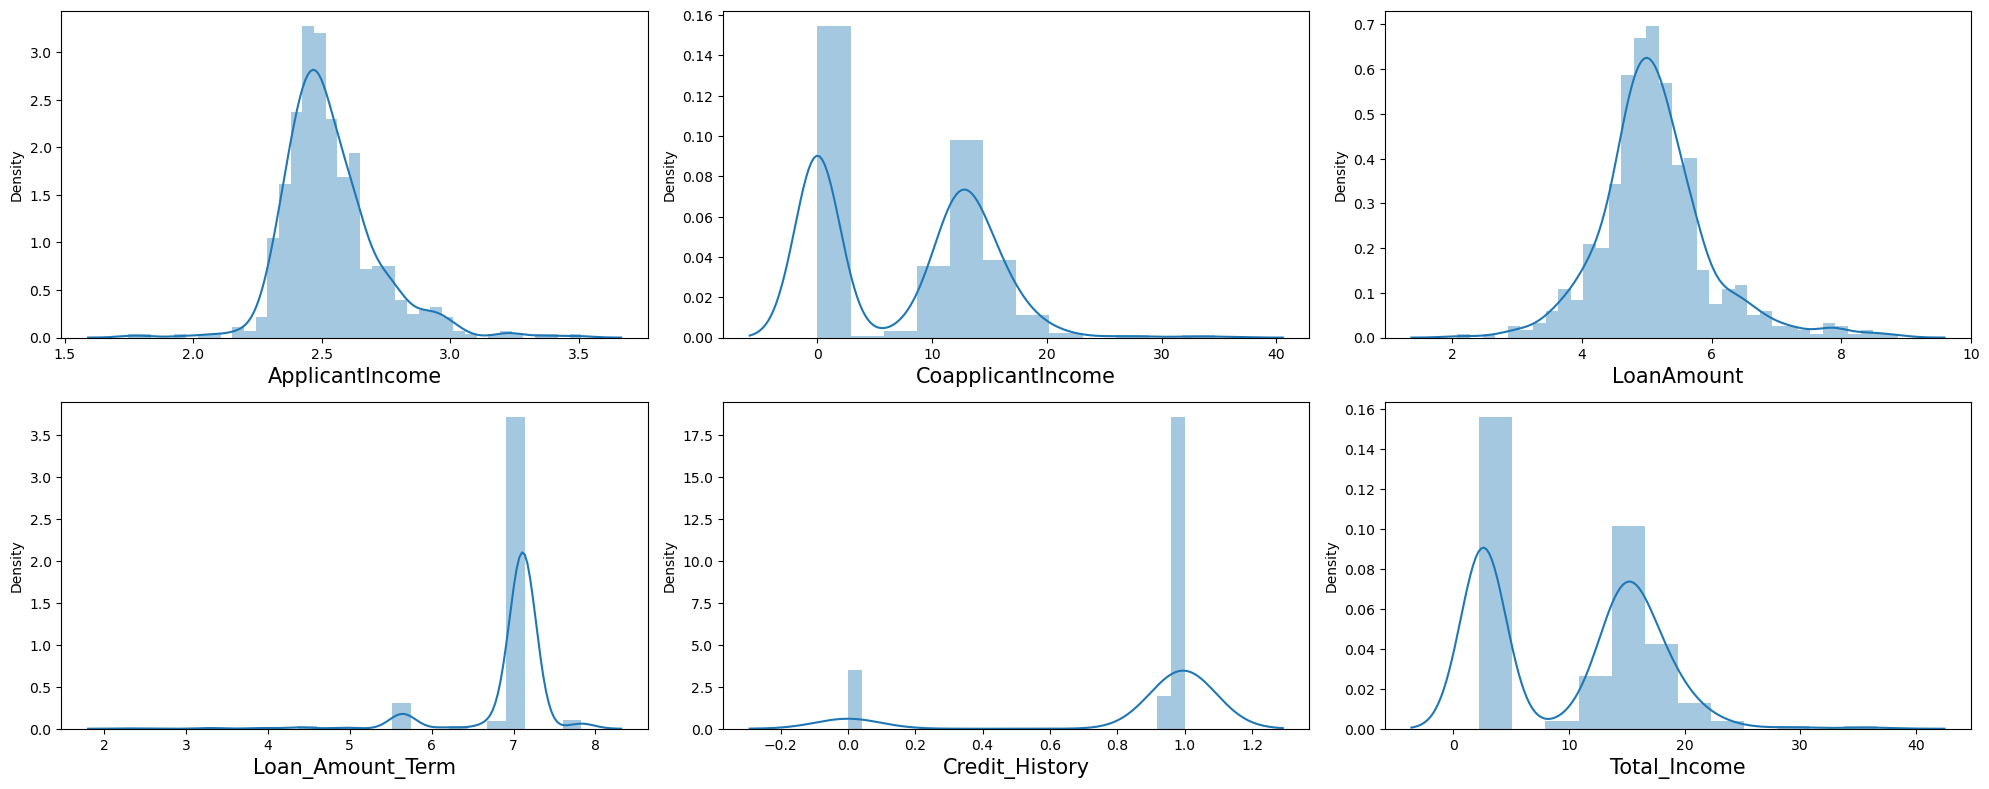

In [62]:
plt.figure(figsize=(20,8))
plotnumber=1
for col in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=15)
    plotnumber+=1
plt.tight_layout()    

In [63]:
df.skew()

ApplicantIncome      1.030738
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -3.573315
Credit_History      -2.014285
Total_Income         0.202065
dtype: float64

In [64]:
from scipy.stats import zscore
z_score= zscore(df[['ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']])
abs_z_score= np.abs(z_score)
filtering_entry= (abs_z_score<3).all(axis=1)
df=df[filtering_entry]

In [65]:
df.shape

(582, 14)

In [34]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,18.017473,0.000000,5.270588,7.113787,1.0,Urban,Y,18.017473
1,LP001003,Male,Yes,1,Graduate,No,16.610522,11.467457,5.039684,7.113787,1.0,Rural,N,28.077979
2,LP001005,Male,Yes,0,Graduate,Yes,14.422496,0.000000,4.041240,7.113787,1.0,Urban,Y,14.422496
3,LP001006,Male,Yes,0,Not Graduate,No,13.720654,13.310098,4.932424,7.113787,1.0,Urban,Y,27.030752
4,LP001008,Male,No,0,Graduate,No,18.171206,0.000000,5.204828,7.113787,1.0,Urban,Y,18.171206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,14.260431,0.000000,4.140818,7.113787,1.0,Rural,Y,14.260431
610,LP002979,Male,Yes,3+,Graduate,No,16.013010,0.000000,3.419952,5.646216,1.0,Rural,Y,16.013010
611,LP002983,Male,Yes,1,Graduate,No,20.059821,6.214465,6.324704,7.113787,1.0,Urban,Y,26.274286
612,LP002984,Male,Yes,2,Graduate,No,19.646281,0.000000,5.718479,7.113787,1.0,Urban,Y,19.646281


In [66]:
df.set_index('Loan_ID', inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,2.621589,0.000000,5.270588,7.113787,1.0,Urban,Y,2.621589
LP001003,Male,Yes,1,Graduate,No,2.551493,11.467457,5.039684,7.113787,1.0,Rural,N,14.018950
LP001005,Male,Yes,0,Graduate,Yes,2.434147,0.000000,4.041240,7.113787,1.0,Urban,Y,2.434147
LP001006,Male,Yes,0,Not Graduate,No,2.394004,13.310098,4.932424,7.113787,1.0,Urban,Y,15.704103
LP001008,Male,No,0,Graduate,No,2.629024,0.000000,5.204828,7.113787,1.0,Urban,Y,2.629024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2.424995,0.000000,4.140818,7.113787,1.0,Rural,Y,2.424995
LP002979,Male,Yes,3+,Graduate,No,2.520525,0.000000,3.419952,5.646216,1.0,Rural,Y,2.520525
LP002983,Male,Yes,1,Graduate,No,2.717121,6.214465,6.324704,7.113787,1.0,Urban,Y,8.931586


In [67]:
from sklearn.preprocessing import OrdinalEncoder

In [68]:
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes =='object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
        
df        

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
Loan_ID,,,,,,,,,,,,,
LP001002,1.0,0.0,0.0,0.0,0.0,2.621589,0.000000,5.270588,7.113787,1.0,2.0,1.0,2.621589
LP001003,1.0,1.0,1.0,0.0,0.0,2.551493,11.467457,5.039684,7.113787,1.0,0.0,0.0,14.018950
LP001005,1.0,1.0,0.0,0.0,1.0,2.434147,0.000000,4.041240,7.113787,1.0,2.0,1.0,2.434147
LP001006,1.0,1.0,0.0,1.0,0.0,2.394004,13.310098,4.932424,7.113787,1.0,2.0,1.0,15.704103
LP001008,1.0,0.0,0.0,0.0,0.0,2.629024,0.000000,5.204828,7.113787,1.0,2.0,1.0,2.629024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0.0,0.0,0.0,0.0,0.0,2.424995,0.000000,4.140818,7.113787,1.0,0.0,1.0,2.424995
LP002979,1.0,1.0,3.0,0.0,0.0,2.520525,0.000000,3.419952,5.646216,1.0,0.0,1.0,2.520525
LP002983,1.0,1.0,1.0,0.0,0.0,2.717121,6.214465,6.324704,7.113787,1.0,2.0,1.0,8.931586


In [69]:
df['Loan_Status'].value_counts()

1.0    402
0.0    180
Name: Loan_Status, dtype: int64

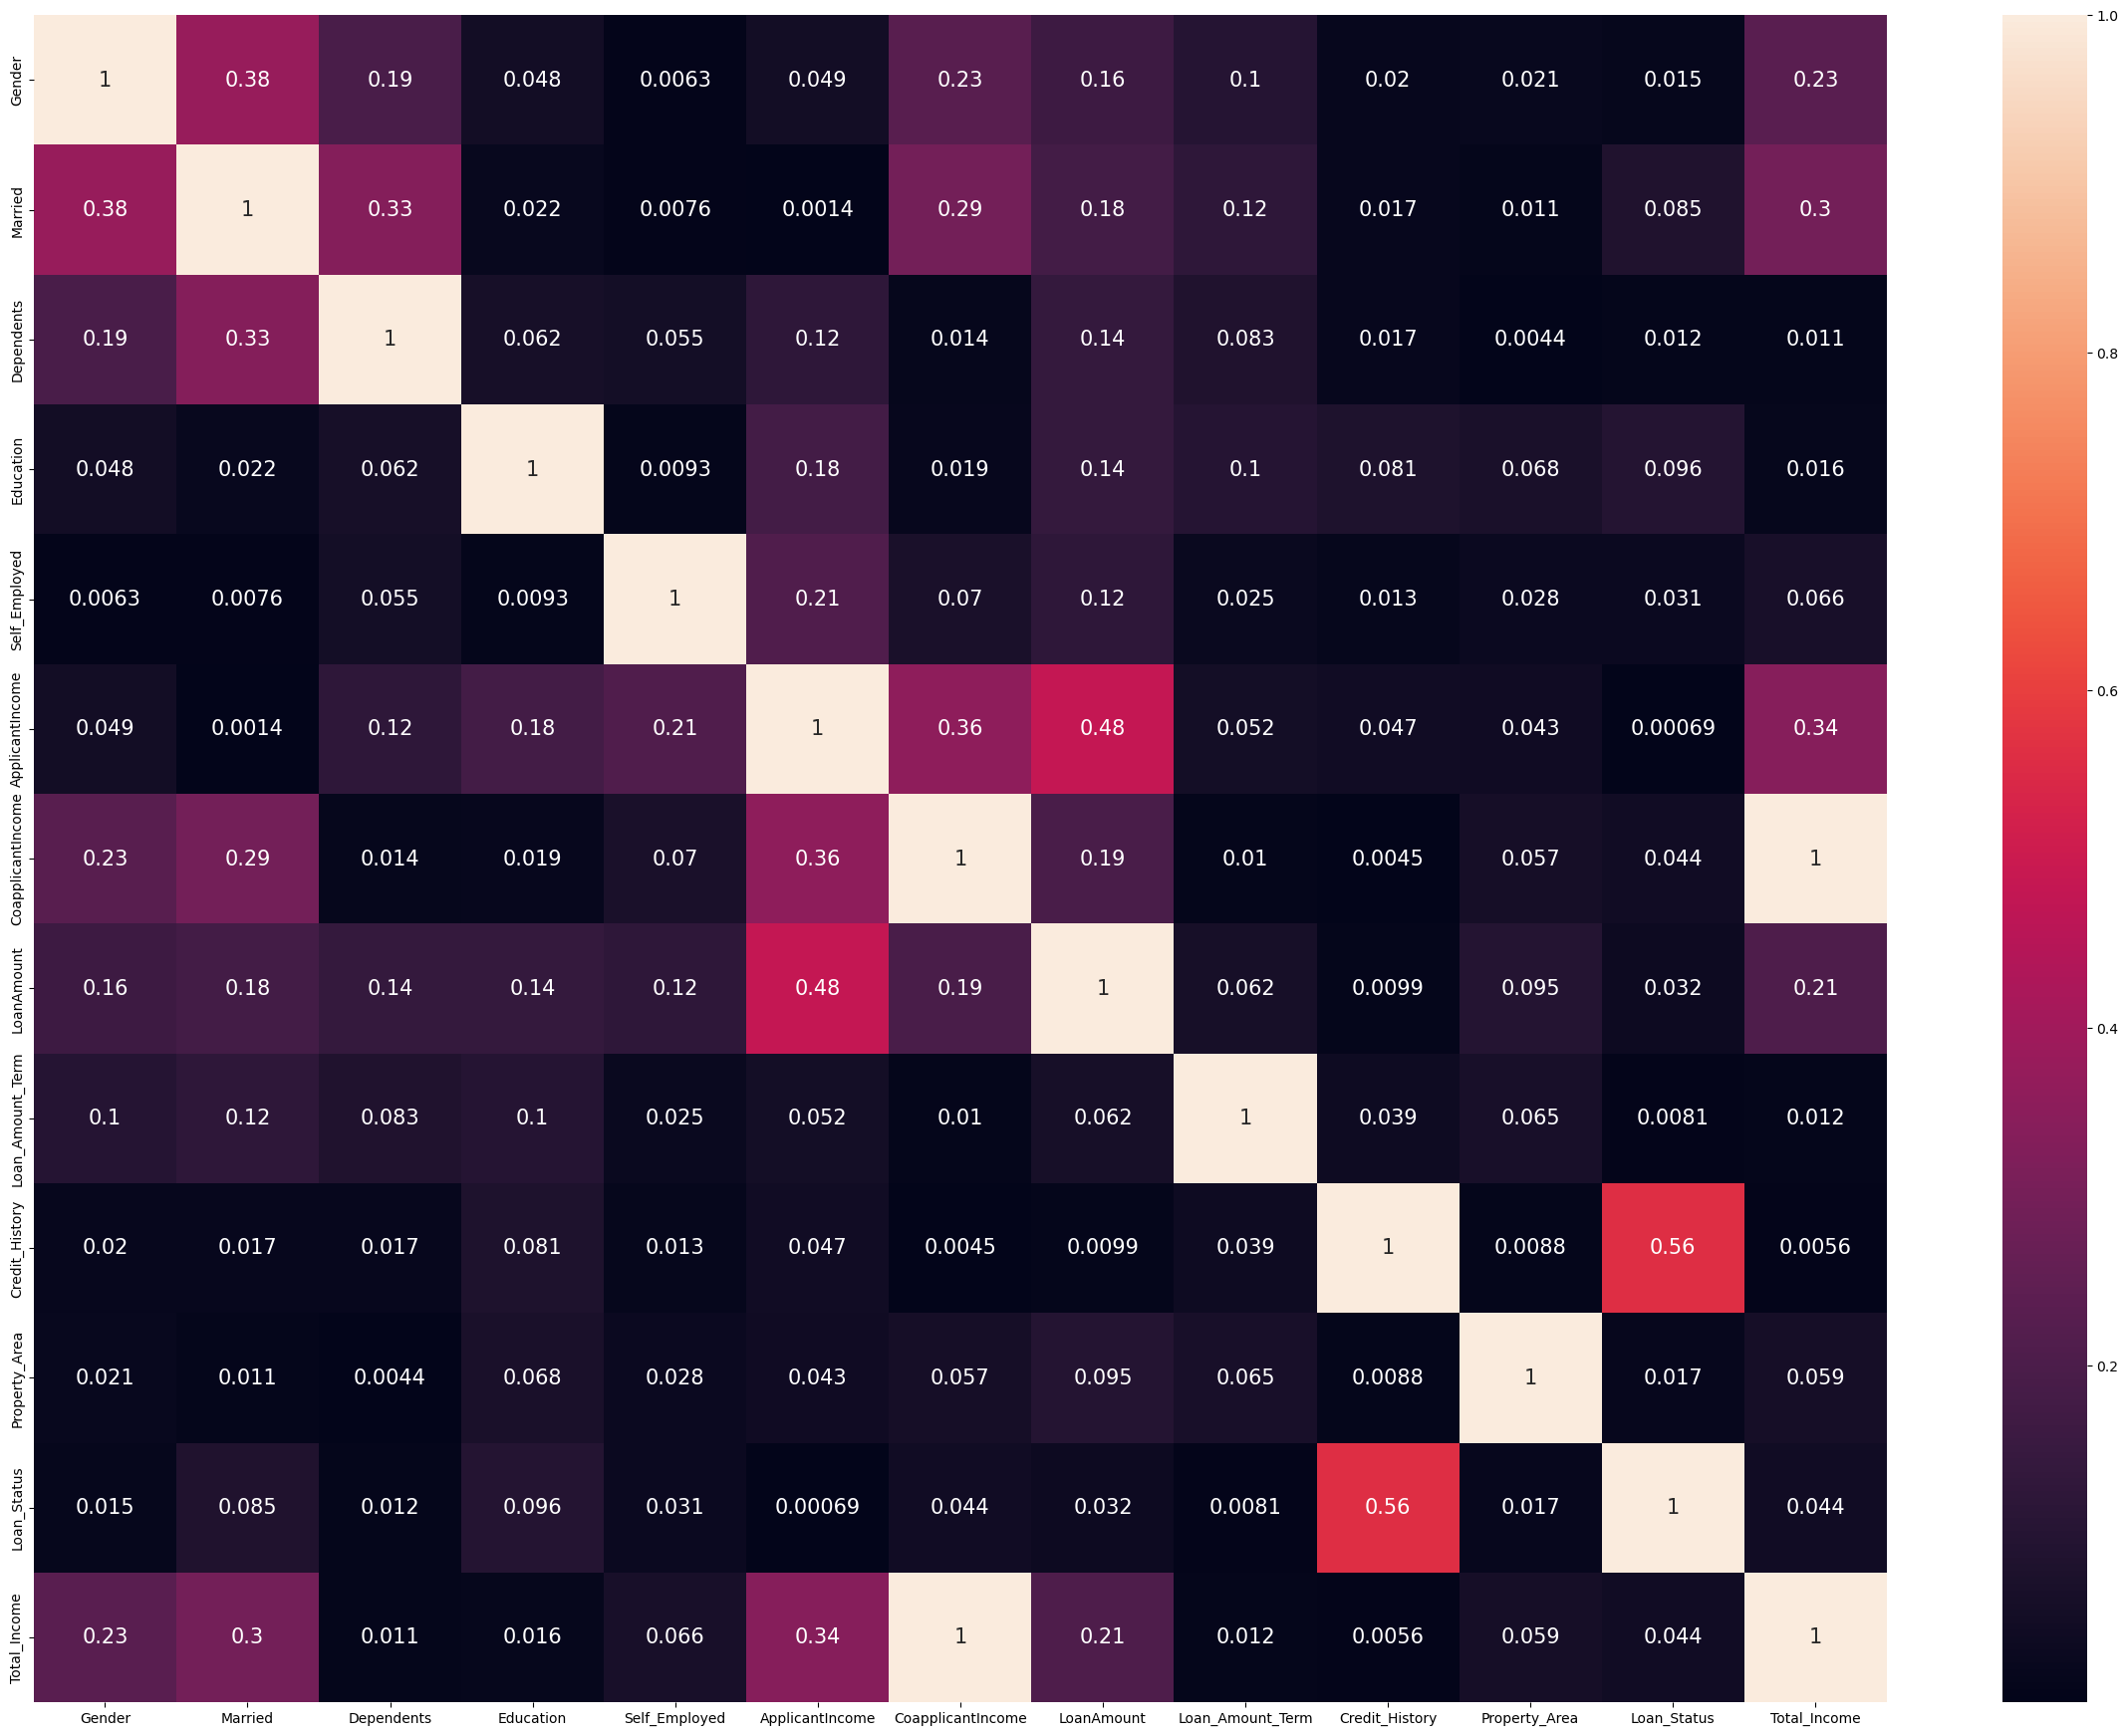

In [71]:
df_corr= df.corr().abs()
plt.figure(figsize=(30,22))
sns.heatmap(df_corr, annot=True, annot_kws={'size':15})
plt.show()

In [72]:
X= df.drop('Loan_Status', axis=1)
y= df['Loan_Status']

In [73]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [75]:
x_scaled.shape[1]
vif = pd.DataFrame()
vif['vif']= [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features']= X.columns
vif

,vif,Features
0,1.220037,Gender
1,1.381113,Married
2,1.176374,Dependents
3,1.075067,Education
4,1.049720,Self_Employed
5,inf,ApplicantIncome
6,inf,CoapplicantIncome
7,1.700272,LoanAmount
8,1.061916,Loan_Amount_Term
9,1.012318,Credit_History


In [76]:
X.drop('Total_Income', axis=1, inplace=True)

In [78]:
x_scaled = scaler.fit_transform(X)
x_scaled.shape[1]
vif = pd.DataFrame()
vif['vif']= [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features']= X.columns
vif

,vif,Features
0,1.220037,Gender
1,1.381113,Married
2,1.176374,Dependents
3,1.075067,Education
4,1.049720,Self_Employed
5,1.931680,ApplicantIncome
6,1.601282,CoapplicantIncome
7,1.700272,LoanAmount
8,1.061916,Loan_Amount_Term
9,1.012318,Credit_History


In [79]:
from imblearn.over_sampling import SMOTE
SM= SMOTE()
x1,y1 = SM.fit_resample(X,y)

In [80]:
y1.value_counts()

1.0    402
0.0    402
Name: Loan_Status, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import cross_val_score

In [82]:
maxAccu=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    accu = accuracy_score(pred, y_test)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("Best accuracy is ", accu,"at random state ", maxRS)   

Best accuracy is  0.7701863354037267 at random state  111


In [83]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.20, random_state=maxRS)

In [84]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8198757763975155
[[54 27]
 [ 2 78]]
              precision    recall  f1-score   support

         0.0       0.96      0.67      0.79        81
         1.0       0.74      0.97      0.84        80

    accuracy                           0.82       161
   macro avg       0.85      0.82      0.82       161
weighted avg       0.85      0.82      0.82       161



In [85]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9006211180124224
[[74  7]
 [ 9 71]]
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90        81
         1.0       0.91      0.89      0.90        80

    accuracy                           0.90       161
   macro avg       0.90      0.90      0.90       161
weighted avg       0.90      0.90      0.90       161



In [86]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8509316770186336
[[65 16]
 [ 8 72]]
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84        81
         1.0       0.82      0.90      0.86        80

    accuracy                           0.85       161
   macro avg       0.85      0.85      0.85       161
weighted avg       0.85      0.85      0.85       161



In [87]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8322981366459627
[[64 17]
 [10 70]]
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.83        81
         1.0       0.80      0.88      0.84        80

    accuracy                           0.83       161
   macro avg       0.83      0.83      0.83       161
weighted avg       0.83      0.83      0.83       161



In [88]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9130434782608695
[[73  8]
 [ 6 74]]
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91        81
         1.0       0.90      0.93      0.91        80

    accuracy                           0.91       161
   macro avg       0.91      0.91      0.91       161
weighted avg       0.91      0.91      0.91       161



In [89]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [90]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7329192546583851
[[57 24]
 [19 61]]
              precision    recall  f1-score   support

         0.0       0.75      0.70      0.73        81
         1.0       0.72      0.76      0.74        80

    accuracy                           0.73       161
   macro avg       0.73      0.73      0.73       161
weighted avg       0.73      0.73      0.73       161



In [91]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN = LR.predict(x_test)
print(accuracy_score(y_test, predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.8198757763975155
[[54 27]
 [ 2 78]]
              precision    recall  f1-score   support

         0.0       0.96      0.67      0.79        81
         1.0       0.74      0.97      0.84        80

    accuracy                           0.82       161
   macro avg       0.85      0.82      0.82       161
weighted avg       0.85      0.82      0.82       161



In [92]:
score = cross_val_score(LR, x1, y1)
print(score)
print(score.mean())
print("The difference between Accuracy score and CV score is ", accuracy_score(y_test, predLR)-score.mean())

[0.68944099 0.73913043 0.77018634 0.77018634 0.64375   ]
0.7225388198757765
The difference between Accuracy score and CV score is  0.09733695652173902


In [93]:
score = cross_val_score(RFC, x1, y1)
print(score)
print(score.mean())
print("The difference between Accuracy score and CV score is ", accuracy_score(y_test, predRFC)-score.mean())

[0.7515528  0.7515528  0.88198758 0.85714286 0.9       ]
0.8284472049689441
The difference between Accuracy score and CV score is  0.07217391304347831


In [94]:
score = cross_val_score(GB, x1, y1)
print(score)
print(score.mean())
print("The difference between Accuracy score and CV score is ", accuracy_score(y_test, predGB)-score.mean())

[0.69565217 0.73291925 0.83850932 0.86335404 0.85625   ]
0.7973369565217391
The difference between Accuracy score and CV score is  0.05359472049689451


In [95]:
score = cross_val_score(ABC, x1, y1)
print(score)
print(score.mean())
print("The difference between Accuracy score and CV score is ", accuracy_score(y_test, predABC)-score.mean())

[0.67080745 0.72670807 0.82608696 0.83850932 0.83125   ]
0.7786723602484471
The difference between Accuracy score and CV score is  0.053625776397515645


In [96]:
score = cross_val_score(ET, x1, y1)
print(score)
print(score.mean())
print("The difference between Accuracy score and CV score is ", accuracy_score(y_test, predET)-score.mean())

[0.77639752 0.76397516 0.88198758 0.8757764  0.9       ]
0.8396273291925466
The difference between Accuracy score and CV score is  0.07341614906832294


In [97]:
score = cross_val_score(svc, x1, y1)
print(score)
print(score.mean())
print("The difference between Accuracy score and CV score is ", accuracy_score(y_test, predsvc)-score.mean())

[0.69565217 0.73913043 0.72670807 0.62111801 0.69375   ]
0.6952717391304348
The difference between Accuracy score and CV score is  0.037647515527950315


In [98]:
score = cross_val_score(KNN, x1, y1)
print(score)
print(score.mean())
print("The difference between Accuracy score and CV score is ", accuracy_score(y_test, predKNN)-score.mean())

[0.74534161 0.79503106 0.78881988 0.80124224 0.83125   ]
0.7923369565217392
The difference between Accuracy score and CV score is  0.027538819875776333


In [99]:
parameters = {'criterion':['gini','Entropy'],'random_state':[78,400,1000],
             'max_depth':[5,10,25],'n_jobs':[0,3,7],'n_estimators':[50,100,200,300]}

In [100]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [101]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'Entropy'],
                         'max_depth': [5, 10, 25],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [0, 3, 7], 'random_state': [78, 400, 1000]})

In [102]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'n_estimators': 300,
 'n_jobs': 3,
 'random_state': 400}

In [103]:
Final_model = ExtraTreesClassifier(criterion='gini',max_depth=25,n_estimators=300, n_jobs=3, random_state=400)
Final_model.fit(x_train,y_train)
pred= Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.92546583850931


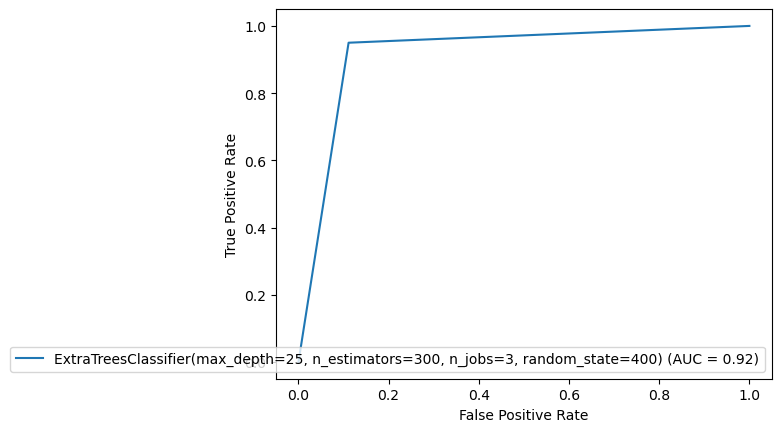

In [104]:
from sklearn import metrics
fpr,tpr, thresholds= metrics.roc_curve(y_test,pred)
roc_auc= metrics.auc(fpr,tpr)
display= metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc= roc_auc, estimator_name= Final_model)
display.plot()

In [105]:
import joblib 
joblib.dump(Final_model,"Loan_prediction_Analysis.pkl")

['Loan_prediction_Analysis.pkl']

In [106]:
model = joblib.load("Loan_prediction_Analysis.pkl")
prediction= model.predict(x_test)
prediction

array([1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 0.])

In [107]:
a= np.array(y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['orginal']= a
df

,Predicted,orginal
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
156,1.0,1.0
157,0.0,0.0
158,1.0,1.0
159,0.0,0.0
